## Lab 5: Car Crashes Data Visualizations
Raj Saluja (11/12/19)

### Abstract
* I am using a dataset that contains data about car crashes
* I am hoping to find a few questions
    1. What are the range of results for each column?
    2. What is the linear regression of total car crashes and being distracted?
    3. What is the correlation between the total number of car crashes, speeding, and alcohol?


### Dataset Exploration

In [2]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

Here I am importing everything I might need for the rest of my lab.

In [3]:
df = sns.load_dataset("car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


Here I printed the head of the dataset to get a feel of what it looks like. I see that there are eight colomns that cover a lot of interesting pieces of data. I realise that the last column cover state, and this won't be very useable because it doesn't have numbers so it will be hard or possibly impossible to graph. Based on the columns it appears as if one column is the total number of crashes, six columns are potential causes for these crashes, and one column is the states these crashes took place in. The best piece of data appears to be the total so I will be focusing on the total and how other columns are correlated with it. This way I will be able to discover whate some of the main reasons for driving accidents are moving forward.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
total             51 non-null float64
speeding          51 non-null float64
alcohol           51 non-null float64
not_distracted    51 non-null float64
no_previous       51 non-null float64
ins_premium       51 non-null float64
ins_losses        51 non-null float64
abbrev            51 non-null object
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


Here I used .info to confirm my finding when I printed the head and everything was correct. It also told me that there are 51 rows in this dataset.

In [10]:
df.tail()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
46,12.7,2.413,3.429,11.049,11.176,768.95,153.72,VA
47,10.6,4.452,3.498,8.692,9.116,890.03,111.62,WA
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
49,13.8,4.968,4.554,5.382,11.592,670.31,106.62,WI
50,17.4,7.308,5.568,14.094,15.660,791.14,122.04,WY


Here I printed the tail of my dataset to see if there were any extra notes that I needed to consider and there weren't any.

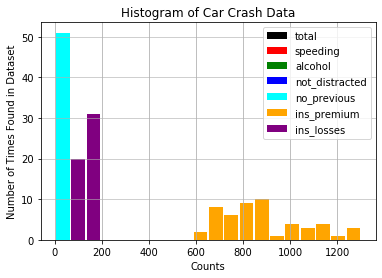

In [34]:
size, scale = 1000, 10

df.plot.hist(grid=True, bins=20, rwidth=0.9,
                   color=['black', 'red', 'green', 'blue', 'cyan', 'orange', 'purple'])
plt.title('Histogram of Car Crash Data')
plt.xlabel('Counts')
plt.ylabel('Number of Times Found in Dataset')
plt.grid(axis='y', alpha=0.75)

Here I made a histogram to see how common certain results were for each column. I found that all results for no_previous were between 0 and 67 because there were exactly 51 results in that range and only 51 rows in the dataset. Also, all results from ins_losses were between 67 and 200 because there was once again exactly 51. Between the high 500s/low 600s and around 1,500 was very common for ins_premium as well. I noticed that for no_previous the range of results was much smaller and with ins_losses it was pretty small but not as small as no_previous. With ins_premium the rang of results was massive. All of the columns that were not on the graph must have had a massive range of outcomes because there weren't many values that were repeated multiple times. That is why it is so hard to see those columns on the graph. This tells me that the data from this column is very mixed and different. This answers my first question about what the range of results are for each column.

### Dataset Modeling and Analysis

In [37]:
df.describe()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,15.790196,4.998196,4.886784,13.573176,14.004882,886.957647,134.493137
std,4.122002,2.017747,1.729133,4.508977,3.764672,178.296285,24.835922
min,5.900000,1.792000,1.593000,1.760000,5.900000,641.960000,82.750000
25%,12.750000,3.766500,3.894000,10.478000,11.348000,768.430000,114.645000
50%,15.600000,4.608000,4.554000,13.857000,13.775000,858.970000,136.050000
75%,18.500000,6.439000,5.604000,16.140000,16.755000,1007.945000,151.870000
max,23.900000,9.450000,10.038000,23.661000,21.280000,1301.520000,194.780000


Here I described my data to see what the overall dataset tells me. In particular, I looked closely at the mean for the total number of car crashes, speeding, and alcohol. The mean states that there was an average of 15.79 car crashes, 4.99 speeding, and 4.88 alcohol. This tells me that around 62.5% of car crashes are caused by either speeding or alcohol, things that everybody knows not to do. if everybody just listened to the law and did what they knew was safest driving would be a lot safer. This tells me that moving forward there is a good chance to make driving safer if the amount of speeding and alcohol when driving is decreased. This partially answers my third question about the correlation between total crashes, speeding, and alcohol.

In [7]:
df.iloc[:, 2].values.reshape(-1, 1)
X = df.iloc[:, 3].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df.iloc[:, 0].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

Here I set up my linear regression graph. On the first I converted the year column of my dataset into a numpy array. Then I did the same thing with the value column of my dataset. Next I created an object for the class. After that I performed the linear regression and made predictions.

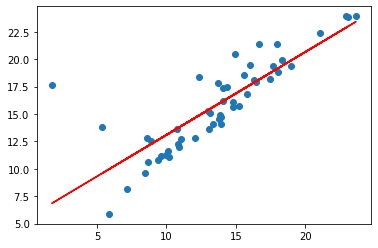

In [8]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

Here I made my linear regression graph. I made the regression line, which is based on the number of total crashes on the y-axis and the amount of not distracted drivers on the x-axis, red. This was very weird because the linear regression showed the total number of crashes going up when the total number of not distracted drivers went up, whicb makes absolutely no sense. If a driver is distracted they are more likely to not be paying attention to driving which would result in a crach being more likely, with the opposite being the case for not distracted drivers. The only way to explain this is that there must be either a typo on the header and the header actually means the total number of distracted drivers. That makes this linear regression make a lot more sense. It tells me that the more distracted drivers there are the more total car crashes are are, meaning that if you are a distracted driver you are more likely to get into a car crash. This answered my second question about linear regression.

### Conclusions

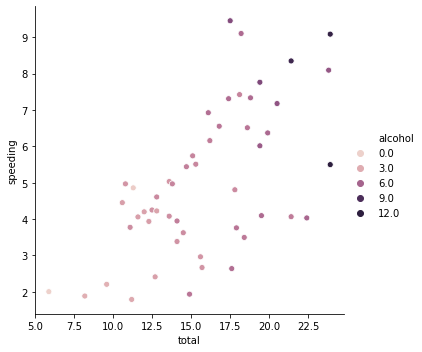

In [35]:
sns.relplot(x="total", y="speeding",hue="alcohol",
            data=df, kind="scatter")

Here I made a scatter graph of the total number of crashes on the x-axis, the amount of speeding on the y-axis, and the amount of alcohol based on the color. This graph tells me three main things. First, it tells me that speeding is directly correlated with an increase in car crashes because the dots on the graph clearly show and upward trend. Second, it tells me that alcohol is also directly correlated with an increase in crashes. This is because the color clearly gets darker as you go further to the right of the graph. The further to the right you are, the more cashes there are and the darker the color the more alcohol there is, so this tells me that the more alcohol you consume the more likely you are to get into a car crash. Finally, this graph tells me that speeding is somewhat correlated with alcohol. The color of the dots definatley appear to be getting dark as you go higher in the graph, but it's not as obvious as the other two correlations. The higher you are the more speeding there is and the darker the color is the more alcohol there is. This tells me that a lot of alcohol can cause speeding but that isn't always going to be the case because the color didn't get that much darker as you went up and there were many instances where darker colors were lower down. This answers my third question about the correlation between the total number of crashes, speeding, and alcohol.

This lab has answered many questions of mine. First it told me that though there was a very narrow range of results for no_previous, ins_losses, and ins_premium there was a very wide rande of results for every other column. It also told me that the more distracted you are while driving the more likely you are to get into a car crash. Finally, it told me that speeding and alcohol cause car crashes and alcohol can cause speeding. 

### Acknowledgments
I would like to thank Ms. Sconyers and these three websites: https://realpython.com/python-histograms/, https://python-graph-gallery.com/3-control-color-of-barplots/, https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d. All four helpedwith my code.